# Data Functionality in Pandas

In [1]:
import pandas as pd
import numpy as np

### Timestamp

In [2]:
pd.Timestamp('9/1/2019 3:40PM')

Timestamp('2019-09-01 15:40:00')

### Period 

In [3]:
pd.Period('3/2019')

Period('2019-03', 'M')

In [4]:
pd.Period('3/5/2019')

Period('2019-03-05', 'D')

### DatetimeIndex

In [5]:
t1 = pd.Series(list('abc'), [pd.Timestamp('10/1/2019'), pd.Timestamp('7/5/2019'), pd.Timestamp('9/11/2019')])
t1

2019-10-01    a
2019-07-05    b
2019-09-11    c
dtype: object

In [6]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [7]:
t2 = pd.Series(list('def'), [pd.Period('3/2020'), pd.Period('2/2019'), pd.Period('8/2019')])
t2

2020-03    d
2019-02    e
2019-08    f
Freq: M, dtype: object

In [8]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [11]:
d1 = ['2 June 1993', 'December 17, 1973', '1970-05-22', '8/12/16']
ts3 = pd.DataFrame(np.random.randint(10,100,(4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 1993,61,72
"December 17, 1973",99,60
1970-05-22,18,28
8/12/16,61,90


In [12]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
1993-06-02,61,72
1973-12-17,99,60
1970-05-22,18,28
2016-08-12,61,90


In [13]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [14]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [15]:
pd.Timestamp('9/3/2016 8:10 AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-15 11:10:00')

### Working with Dates in DataFrame

In [16]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [17]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,106,119
2016-10-16,107,118
2016-10-30,102,122
2016-11-13,97,115
2016-11-27,95,128
2016-12-11,93,121
2016-12-25,92,127
2017-01-08,99,117
2017-01-22,104,127


In [18]:
df.index.weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [19]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,1.0,-1.0
2016-10-30,-5.0,4.0
2016-11-13,-5.0,-7.0
2016-11-27,-2.0,13.0
2016-12-11,-2.0,-7.0
2016-12-25,-1.0,6.0
2017-01-08,7.0,-10.0
2017-01-22,5.0,10.0


In [20]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,105.0,119.666667
2016-11-30,96.0,121.500000
2016-12-31,92.5,124.000000
2017-01-31,101.5,122.000000


In [21]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,93,121
2016-12-25,92,127
2017-01-08,99,117
2017-01-22,104,127


In [22]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,106,119
2016-10-09,106,119
2016-10-16,107,118
2016-10-23,107,118
2016-10-30,102,122
2016-11-06,102,122
2016-11-13,97,115
2016-11-20,97,115
2016-11-27,95,128
2016-12-04,95,128


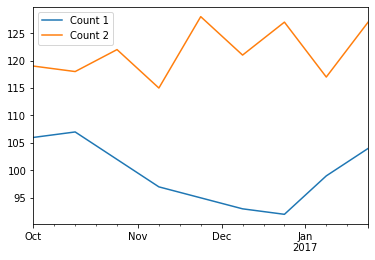

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()